In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import matplotlib.cm as cm

In [14]:
def stable_manifold(y):
    return -(1/6)*y**2 -(1/24)*y**3 -(1/240)*y**4

def xdot(state, t):
    x, y = state
    return [ 2*x + y**2,
            -2*y + x**2 + y**2]

In [56]:
timespan = (0., -13.)
y0 = 0.005
initial_conditions = [stable_manifold(y0), y0]

sol = solve_ivp(lambda t, y: xdot(y, t), t_span=timespan, y0=initial_conditions, max_step = 0.1)

x, y = sol.y

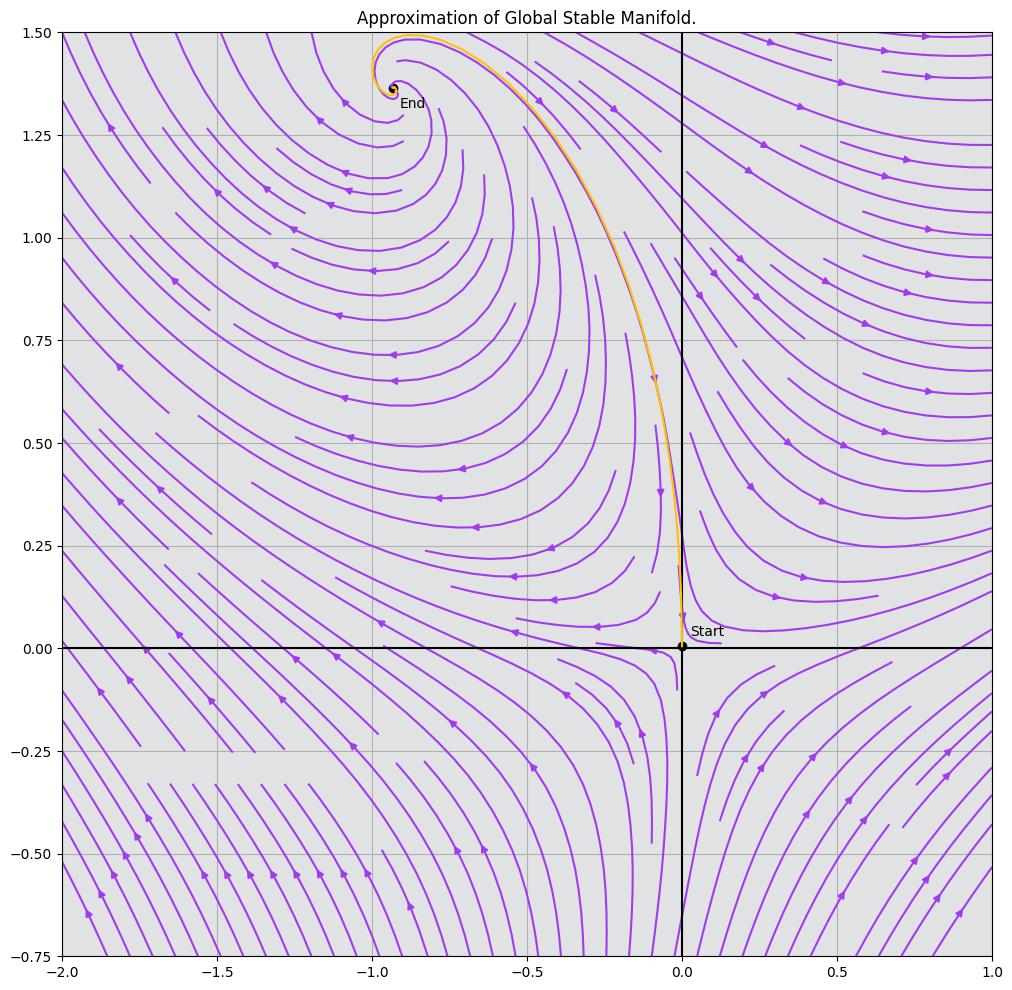

In [78]:

fig, axs = plt.subplots(1, 1, figsize =(12, 12))
#Vector field
xvect, yvect= np.meshgrid(np.linspace(-2, 1, 20),  
                   np.linspace(-0.75, 1.5, 10)) 

#Update vector field
u = 2*xvect + yvect**2
v = -2*yvect + xvect**2 + yvect**2

#Plotting Stream plot
axs.streamplot(xvect,yvect,u,v, density=1.4, linewidth=None, color='#A23BEC' ) 

#Plotting x any y axes
axs.plot(np.linspace(0, 0, 20), np.linspace(-0.75, 1.5, 20), color='k')
axs.plot(np.linspace(-2, 1, 20), np.linspace(0, 0, 20), color='k')
axs.grid(True)

axs.plot(x, y, color = "#FFC107")


#Plotting start and end points
axs.annotate("Start", xy=(stable_manifold(y0), y0), xytext=(stable_manifold(y0) + 0.025, y0 + 0.025))
axs.scatter(stable_manifold(y0), y0, color = "k")

axs.annotate("End", xy=(x[-1], y[-1]), xytext=(x[-1] + 0.02, y[-1] - 0.05))
axs.scatter(x[-1], y[-1], color = "k")



axs.set_title("Approximation of Global Stable Manifold.")
axs.set_facecolor("#e1e2e3")